In [113]:
import numpy as np

In [114]:
import pandas as pd

In [115]:
from keras.models import model_from_json

In [116]:
# func to save and load file to reduce processing time
import pickle
def save(dictionary, name):
    with open(name, 'wb') as fp:
        pickle.dump(dictionary, fp, protocol=pickle.HIGHEST_PROTOCOL)

# func to load:
def load(name):
    with open(name, 'rb') as fp:
        data = pickle.load(fp)
        return data

In [117]:
# save(dict1,"dict_rainfallFinal")

In [121]:
dict1=load("dict_rainfallFinal")

In [122]:
# dict1

In [123]:
# p=n.iloc[3]

In [124]:
# n.iloc[0][15]

In [125]:
# p=p.drop(['State','District','Year','vlookup'])

In [126]:
# p=np.array(p)

In [127]:
# li=[]

In [128]:
# li=p

In [129]:
# dicttemp={}

In [130]:
# dicttemp[0]=p

In [131]:

# dicttemp[0]

In [132]:
len(dict1['adilabad'])
    

102

In [133]:
def predictdistrict(name):
    ll=[]
    for i in dict1[name]:
        ll.append(dict1[name][i])
    ll=np.array(ll)
   

    district=ll
#     print(district," ",district.shape)
    district_train=district[:90]
    district_test=district[90:]
    xtrain,ytrain=create_dataset(district_train,10)
    xtest=create_dataset_testx(district_test,10)
    ytest=create_dataset_testy(district_test,10)
    return xtrain,ytrain,xtest,ytest  

In [134]:
def create_dataset(data,k):
    datax,datay=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k]
        datax.append(x)
        y=data[i+k]
        datay.append(y)
    return np.array(datax),np.array(datay)

In [135]:
def create_dataset_testx(data,k):
    datax=[]
    for i in range(data.shape[0]-k+1):
        x=data[i:i+k]
        datax.append(x)
    return np.array(datax)

In [136]:
def create_dataset_testy(data,k):
    datay=[]
    for i in range(data.shape[0]-k):
         y=data[i+k]
         datay.append(y)
    return np.array(datay)

In [137]:
districtname='lucknow'
xtrain,ytrain,xtest,ytest=predictdistrict(districtname)

In [138]:
xtrain.shape

(80, 10, 12)

In [139]:
ytrain.shape

(80, 12)

In [140]:
xtest.shape

(3, 10, 12)

In [141]:
ytest.shape

(2, 12)

In [142]:
xtest.shape,ytest.shape

((3, 10, 12), (2, 12))

In [143]:
from keras.layers import SimpleRNN,Dense,LSTM,Dropout,Activation,BatchNormalization

In [144]:
from keras.models import Sequential

In [145]:
from keras import optimizers

In [146]:
model=Sequential()
look_back=10

In [147]:
model.add(SimpleRNN(1000,input_shape=(look_back,12)))
model.add(Dense(12))
model.add(Dropout(0.2,input_shape=(look_back,)))
model.add(Dense(1000))
model.add(Dense(12))
sgd = optimizers.rmsprop(lr=0.005)
model.compile(loss='mean_absolute_error',optimizer='sgd',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=100,batch_size=4)

Epoch 1/100
80/80 [==============================] - 3s 33ms/step - loss: 74.3415 - acc: 0.4500
Epoch 2/100
80/80 [==============================] - 2s 19ms/step - loss: 43.2019 - acc: 0.6000
Epoch 3/100
80/80 [==============================] - 2s 19ms/step - loss: 34.8483 - acc: 0.4750
Epoch 4/100
80/80 [==============================] - 2s 19ms/step - loss: 34.4918 - acc: 0.5375
Epoch 5/100
80/80 [==============================] - 2s 20ms/step - loss: 33.8217 - acc: 0.4375
Epoch 6/100
80/80 [==============================] - 2s 20ms/step - loss: 35.4403 - acc: 0.5750
Epoch 7/100
80/80 [==============================] - 2s 20ms/step - loss: 34.1604 - acc: 0.5875
Epoch 8/100
80/80 [==============================] - 2s 20ms/step - loss: 32.8703 - acc: 0.5750
Epoch 9/100
80/80 [==============================] - 2s 20ms/step - loss: 33.5187 - acc: 0.5750
Epoch 10/100
80/80 [==============================] - 2s 20ms/step - loss: 33.0274 - acc: 0.5875
Epoch 11/100
80/80 [===================

In [148]:
ypred=model.predict(xtest)

In [153]:
model.evaluate(xtest[:2],ytest)

2/2 [==============================] - 0s 13ms/step


[24.25465202331543, 0.5]

In [154]:
ypred[0][1]

10.767124

In [155]:
# # saving model to json file:
# model_json = model.to_json()
# with open("pratapgarhmodelrainfall.json", "w") as json_file:
#     json_file.write(model_json)
# # saving weights:
# model.save_weights("pratapgarhrainfall.h5")
# print("Done")

In [156]:
# # loading model and weights:
# json_file = open('modelrainfall.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # loading wt:
# loaded_model.load_weights("lucknowrainfall.h5")
# print("loaded successfully")

In [157]:
xtest.shape

(3, 10, 12)

In [158]:
model.evaluate(xtest[:2],ytest)

2/2 [==============================] - 0s 12ms/step


[24.25465202331543, 0.5]

In [159]:
for i in range(ypred.shape[0]):
    for j in range(ypred.shape[1]):
        if(ypred[i][j]<0):
            ypred[i][j]=0

In [160]:
ytest,ypred

(array([[3.987, 2.66, 5.215, 7.774, 11.248, 97.27799999999999, 186.197,
         168.035, 86.39, 60.728, 3.1839999999999997, 0.631],
        [20.585, 15.14, 4.216, 1.642, 0.787, 27.354, 98.29, 227.646,
         197.192, 72.494, 4.789, 4.738]], dtype=object),
 array([[ 14.700002  ,  10.767124  ,   5.0411935 ,   1.137018  ,
           3.9801457 ,  63.499428  , 217.64919   , 251.88919   ,
         129.60834   ,  24.276716  ,   0.9602755 ,   2.809264  ],
        [ 14.698712  ,  10.766107  ,   5.040847  ,   1.1367954 ,
           3.9797552 ,  63.49375   , 217.63017   , 251.86726   ,
         129.59688   ,  24.274544  ,   0.96018934,   2.809172  ],
        [ 14.432809  ,  10.555982  ,   4.955791  ,   1.1516786 ,
           3.8923154 ,  62.43058   , 213.98218   , 247.84239   ,
         127.75124   ,  23.903046  ,   0.94164765,   2.7570517 ]],
       dtype=float32))

In [161]:
ytest.shape

(2, 12)

In [162]:
import matplotlib.pyplot as plt

In [163]:
y_pred_flatten=ypred.ravel()


In [164]:
y_test_flatten=ytest

In [165]:
ypred1=np.vstack((y_test_flatten,ypred[2]))

In [166]:
ypred,ypred1

(array([[ 14.700002  ,  10.767124  ,   5.0411935 ,   1.137018  ,
           3.9801457 ,  63.499428  , 217.64919   , 251.88919   ,
         129.60834   ,  24.276716  ,   0.9602755 ,   2.809264  ],
        [ 14.698712  ,  10.766107  ,   5.040847  ,   1.1367954 ,
           3.9797552 ,  63.49375   , 217.63017   , 251.86726   ,
         129.59688   ,  24.274544  ,   0.96018934,   2.809172  ],
        [ 14.432809  ,  10.555982  ,   4.955791  ,   1.1516786 ,
           3.8923154 ,  62.43058   , 213.98218   , 247.84239   ,
         127.75124   ,  23.903046  ,   0.94164765,   2.7570517 ]],
       dtype=float32),
 array([[3.987, 2.66, 5.215, 7.774, 11.248, 97.27799999999999, 186.197,
         168.035, 86.39, 60.728, 3.1839999999999997, 0.631],
        [20.585, 15.14, 4.216, 1.642, 0.787, 27.354, 98.29, 227.646,
         197.192, 72.494, 4.789, 4.738],
        [14.432808876037598, 10.555981636047363, 4.955790996551514,
         1.1516785621643066, 3.89231538772583, 62.430580139160156,
         2

Text(0,0.5,'Rainfall  (in mm)')

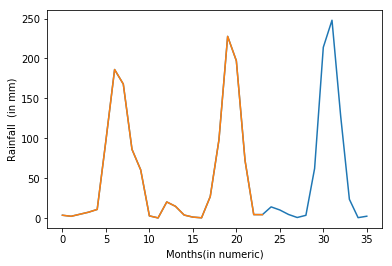

In [167]:
plt.plot(ypred1.ravel())

plt.plot(ytest.ravel())
plt.xlabel("Months(in numeric)")
plt.ylabel("Rainfall  (in mm)")

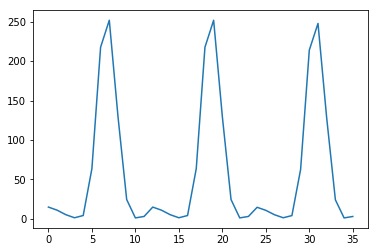

In [168]:
plt.plot(ypred.ravel())

In [169]:
ytest

array([[3.987, 2.66, 5.215, 7.774, 11.248, 97.27799999999999, 186.197,
        168.035, 86.39, 60.728, 3.1839999999999997, 0.631],
       [20.585, 15.14, 4.216, 1.642, 0.787, 27.354, 98.29, 227.646,
        197.192, 72.494, 4.789, 4.738]], dtype=object)

In [170]:
prediction=ypred[2]

In [171]:
prediction

array([ 14.432809  ,  10.555982  ,   4.955791  ,   1.1516786 ,
         3.8923154 ,  62.43058   , 213.98218   , 247.84239   ,
       127.75124   ,  23.903046  ,   0.94164765,   2.7570517 ],
      dtype=float32)

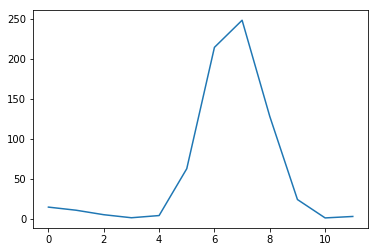

In [172]:
plt.plot(prediction)

In [173]:
sum1=abs(ypred[0]-ytest[0])
sum2=abs(ypred[1]-ytest[1])

In [174]:
ytest[0]

array([3.987, 2.66, 5.215, 7.774, 11.248, 97.27799999999999, 186.197,
       168.035, 86.39, 60.728, 3.1839999999999997, 0.631], dtype=object)

In [175]:
sum1.sum(),sum2.sum()

(266.05532645177846, 316.05639260959623)

In [176]:
ypred[2]

array([ 14.432809  ,  10.555982  ,   4.955791  ,   1.1516786 ,
         3.8923154 ,  62.43058   , 213.98218   , 247.84239   ,
       127.75124   ,  23.903046  ,   0.94164765,   2.7570517 ],
      dtype=float32)

Text(0,0.5,'Rainfall (in mm)')

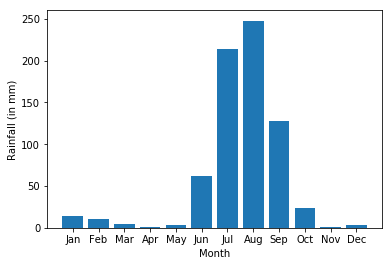

In [177]:
x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x,ypred[2])
plt.xlabel("Month")
plt.ylabel("Rainfall (in mm)")

In [178]:
from keras.layers import SimpleRNN,Dense,LSTM,Dropout,Activation,BatchNormalization

In [179]:
from keras.models import Sequential

In [180]:
from keras import optimizers

In [181]:
model=Sequential()
look_back=10

In [182]:
districtname='lucknow'
xtrain1,ytrain1,xtest1,ytest1=predictdistrict(districtname)

In [183]:
model.add(LSTM(1000,input_shape=(look_back,12)))
model.add(Dense(12))
model.add(Dropout(0.2,input_shape=(look_back,)))
model.add(Dense(1000))
model.add(Dense(12))
sgd = optimizers.rmsprop(lr=0.005)
model.compile(loss='mean_absolute_error',optimizer='sgd',metrics=['accuracy'])
model.fit(xtrain1,ytrain1,epochs=40,batch_size=4)

Epoch 1/40
80/80 [==============================] - 9s 114ms/step - loss: 75.6631 - acc: 0.1250
Epoch 2/40
80/80 [==============================] - 6s 79ms/step - loss: 57.8390 - acc: 0.2625
Epoch 3/40
80/80 [==============================] - 6s 76ms/step - loss: 33.7839 - acc: 0.5000
Epoch 4/40
80/80 [==============================] - 7s 84ms/step - loss: 35.0441 - acc: 0.5250
Epoch 5/40
80/80 [==============================] - 7s 81ms/step - loss: 31.4964 - acc: 0.5875
Epoch 6/40
80/80 [==============================] - 6s 79ms/step - loss: 32.3333 - acc: 0.5875
Epoch 7/40
80/80 [==============================] - 6s 75ms/step - loss: 32.4468 - acc: 0.5500
Epoch 8/40
80/80 [==============================] - 7s 86ms/step - loss: 31.2782 - acc: 0.5875
Epoch 9/40
80/80 [==============================] - 6s 78ms/step - loss: 32.5154 - acc: 0.5875
Epoch 10/40
80/80 [==============================] - 6s 78ms/step - loss: 31.2220 - acc: 0.5875
Epoch 11/40
80/80 [=============================

In [184]:
ypredlstm=model.predict(xtest1)

In [185]:
model.evaluate(xtest1[:2],ytest1)

2/2 [==============================] - 0s 153ms/step


[34.34727478027344, 0.5]

In [186]:
for i in range(ypredlstm.shape[0]):
    for j in range(ypredlstm.shape[1]):
        if(ypredlstm[i][j]<0):
            ypredlstm[i][j]=0

In [187]:
import matplotlib.pyplot as plt

In [188]:
y_predlstm_flatten=ypredlstm.ravel()



In [189]:
y_test1_flatten=ytest1

In [190]:
ypredlstm1=np.vstack((y_test1_flatten,ypredlstm[2]))

Text(0,0.5,'Rainfall  (in mm)')

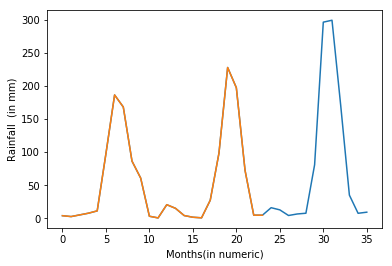

In [191]:
plt.plot(ypredlstm1.ravel())

plt.plot(ytest1.ravel())
plt.xlabel("Months(in numeric)")
plt.ylabel("Rainfall  (in mm)")

Text(0,0.5,'Rainfall (in mm)')

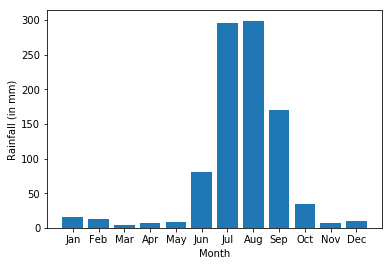

In [192]:
x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x,ypredlstm[2])
plt.xlabel("Month")
plt.ylabel("Rainfall (in mm)")

In [193]:
from sklearn.metrics import mean_absolute_error

In [195]:
rnn = mean_absolute_error(ypred[0], ytest[0])
lstm = mean_absolute_error(ypredlstm[0], ytest1[0])

Text(0,0.5,'Rainfall  (in mm)')

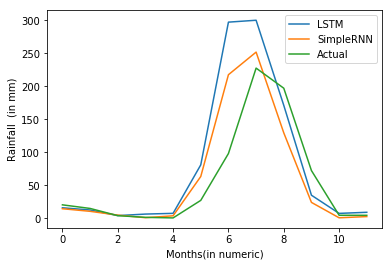

In [203]:
plt.plot(ypredlstm[1], label="LSTM")
plt.plot(ypred[1], label='SimpleRNN')
plt.plot(ytest[1], label='Actual')
plt.xlabel("Months(in numeric)")
plt.legend()
plt.ylabel("Rainfall  (in mm)")

In [201]:
rnn, lstm

(22.171277204314872, 34.14007374318441)